In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
NYC_df = pd.read_csv('Data/NYC_Housing.csv')
NYC_df.head()


,property_url,mls,mls_id,status,style,street,unit,city,state,zip_code,...,last_sold_date,lot_sqft,price_per_sqft,latitude,longitude,stories,hoa_fee,parking_garage,primary_photo,alt_photos
0,https://www.realtor.com/realestateandhomes-det...,BONY,478943,FOR_SALE,MULTI_FAMILY,567 St Johns Pl,NaN,Brooklyn,NY,11238,...,NaN,2079.0,NaN,40.673016,-73.959221,4.0,NaN,NaN,http://ap.rdcpix.com/ea6b413045c4f43f71079fe16...,http://ap.rdcpix.com/ea6b413045c4f43f71079fe16...
1,https://www.realtor.com/realestateandhomes-det...,LINY,H6282166,FOR_SALE,SINGLE_FAMILY,2841 Buhre Ave,NaN,Bronx,NY,10461,...,2012-07-24,2635.0,415.0,40.847532,-73.834634,NaN,0.0,NaN,http://ap.rdcpix.com/a067f13ccc3ec318cbf5e3103...,http://ap.rdcpix.com/a067f13ccc3ec318cbf5e3103...
2,https://www.realtor.com/realestateandhomes-det...,DENY,22241959,FOR_SALE,CONDOS,432 Park Ave,Apt 37B,New York,NY,10022,...,NaN,NaN,3872.0,40.761501,-73.971802,96.0,14647.0,NaN,http://ap.rdcpix.com/19926381fd4a2461c80cd4fa3...,http://ap.rdcpix.com/19926381fd4a2461c80cd4fa3...
3,https://www.realtor.com/realestateandhomes-det...,SINY,1165991,FOR_SALE,CONDOS,4 Jamie Ct,NaN,Staten Island,NY,10314,...,NaN,748.0,503.0,40.622024,-74.150137,2.0,300.0,NaN,http://ap.rdcpix.com/20575ab737ae650d4b72ceb07...,http://ap.rdcpix.com/20575ab737ae650d4b72ceb07...
4,https://www.realtor.com/realestateandhomes-det...,LINY,3522889,FOR_SALE,CONDOS,163-04 71st Ave,Unit 122,Fresh Meadows,NY,11365,...,2008-04-21,NaN,549.0,40.729920,-73.805764,1.0,400.0,1.0,http://ap.rdcpix.com/e0e5d8fac5be173253d641637...,http://ap.rdcpix.com/e0e5d8fac5be173253d641637...


In [3]:

print(NYC_df.columns.tolist())

['property_url', 'mls', 'mls_id', 'status', 'style', 'street', 'unit', 'city', 'state', 'zip_code', 'beds', 'full_baths', 'half_baths', 'sqft', 'year_built', 'days_on_mls', 'list_price', 'list_date', 'sold_price', 'last_sold_date', 'lot_sqft', 'price_per_sqft', 'latitude', 'longitude', 'stories', 'hoa_fee', 'parking_garage', 'primary_photo', 'alt_photos']


In [4]:
NYC_df.shape

(17088, 29)

In [5]:
NYC_df.describe()

,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,sold_price,lot_sqft,price_per_sqft,latitude,longitude,stories,hoa_fee,parking_garage
count,17088.000000,16436.000000,16311.000000,4240.000000,11115.000000,15284.000000,17088.000000,1.708400e+04,9.194000e+03,7.660000e+03,11114.000000,16856.000000,16856.000000,9383.000000,13778.000000,2156.000000
mean,10744.147882,2.935751,2.172460,1.117217,1965.289249,1956.702238,155.683169,2.113517e+06,1.272422e+06,1.079714e+05,1055.316628,40.720115,-73.933606,8.283385,1317.364567,1.896568
std,599.761216,2.586715,1.848622,0.441625,2442.148158,39.208020,156.576276,1.696920e+07,5.654482e+06,3.521889e+06,2238.785727,0.078120,0.090316,16.337517,2788.674168,6.730129
min,10001.000000,0.000000,1.000000,1.000000,102.000000,1655.000000,6.000000,1.000000e+00,2.000000e+03,8.000000e+00,2.000000,40.499789,-74.254440,1.000000,0.000000,1.000000
25%,10028.000000,1.000000,1.000000,1.000000,897.000000,1925.000000,60.000000,5.550000e+05,2.550000e+05,2.003000e+03,444.000000,40.667993,-73.983241,2.000000,0.000000,1.000000
50%,11105.000000,2.000000,2.000000,1.000000,1371.000000,1952.000000,106.000000,9.085000e+05,4.850000e+05,3.000000e+03,714.000000,40.734390,-73.952515,3.000000,677.000000,1.000000
75%,11354.000000,4.000000,3.000000,1.000000,2300.000000,1989.000000,194.000000,1.756250e+06,9.100000e+05,6.000000e+03,1323.000000,40.767500,-73.869605,8.000000,1426.000000,2.000000
max,11697.000000,50.000000,65.000000,12.000000,92655.000000,2025.000000,1090.000000,2.147484e+09,4.171453e+08,2.220158e+08,214748.000000,40.912747,-73.701225,900.000000,138900.000000,200.000000


Checking the distribution of data for each year and month

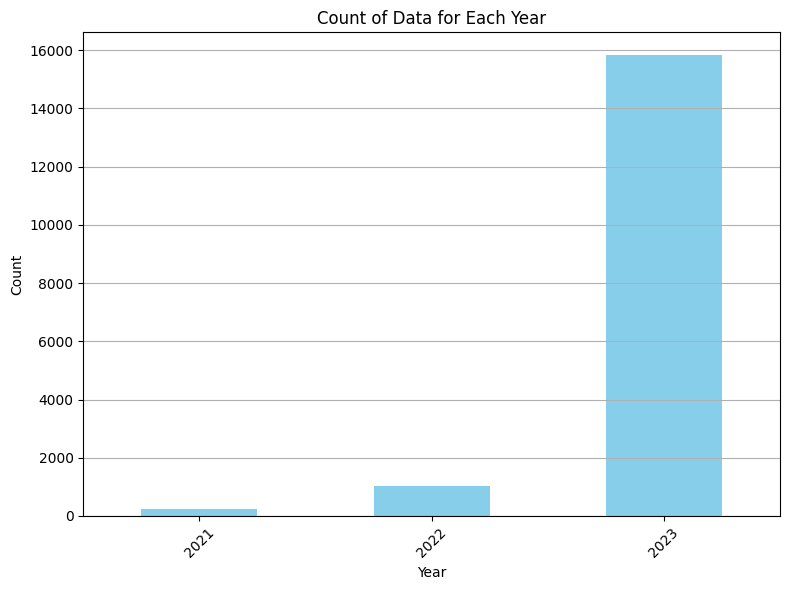

In [6]:
# Convert 'list_date' column to datetime format
NYC_df['list_date'] = pd.to_datetime(NYC_df['list_date'])

# Extract the year into a new column 'year'
NYC_df['year'] = NYC_df['list_date'].dt.year

# Display the DataFrame with the extracted year
plt.figure(figsize=(8, 6))
NYC_df['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Count of Data for Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('EDA/count_data_year.png')  # Save as PNG or specify a different format if needed

plt.show()

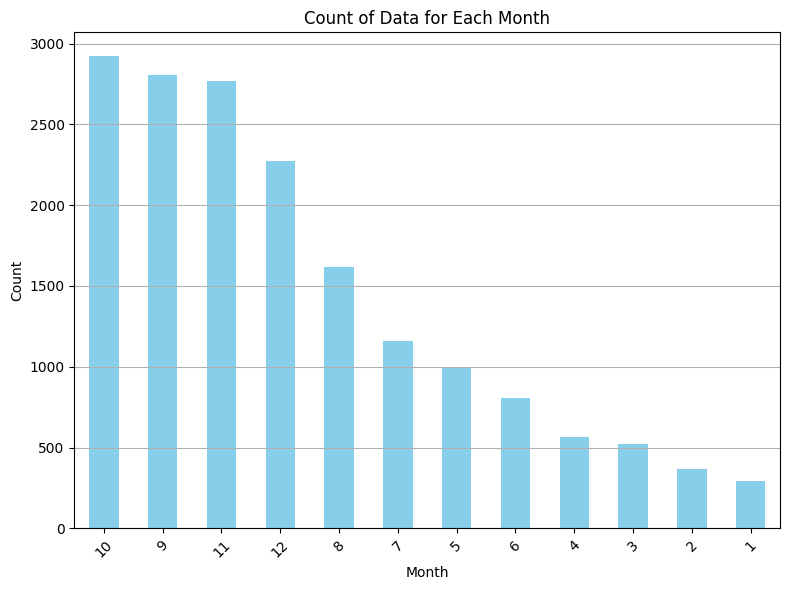

In [7]:
# Convert 'list_date' column to datetime format
NYC_df['list_date'] = pd.to_datetime(NYC_df['list_date'])

# Extract the year into a new column 'year'
NYC_df['month'] = NYC_df['list_date'].dt.month

# Display the DataFrame with the extracted year
plt.figure(figsize=(8, 6))
NYC_df['month'].value_counts().sort_index().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Count of Data for Each Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('EDA/count_data_month.png')  # Save as PNG or specify a different format if needed

plt.show()

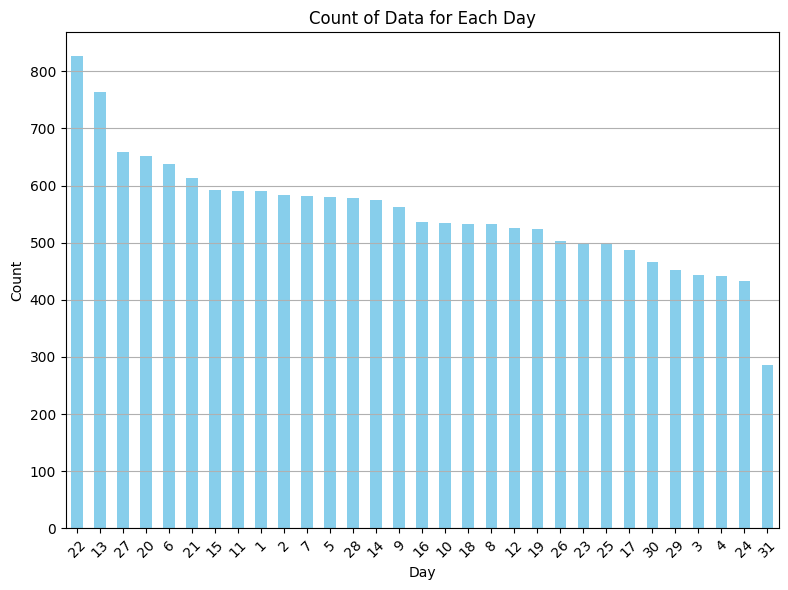

In [8]:
# Convert 'list_date' column to datetime format
NYC_df['list_date'] = pd.to_datetime(NYC_df['list_date'])

# Extract the year into a new column 'year'
NYC_df['day'] = NYC_df['list_date'].dt.day

# Display the DataFrame with the extracted year
plt.figure(figsize=(8, 6))
NYC_df['day'].value_counts().sort_index().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Count of Data for Each Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [9]:
NYC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17088 entries, 0 to 17087
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   property_url    17088 non-null  object        
 1   mls             17088 non-null  object        
 2   mls_id          17088 non-null  object        
 3   status          17088 non-null  object        
 4   style           17088 non-null  object        
 5   street          17074 non-null  object        
 6   unit            10511 non-null  object        
 7   city            17088 non-null  object        
 8   state           17088 non-null  object        
 9   zip_code        17088 non-null  int64         
 10  beds            16436 non-null  float64       
 11  full_baths      16311 non-null  float64       
 12  half_baths      4240 non-null   float64       
 13  sqft            11115 non-null  float64       
 14  year_built      15284 non-null  float64       
 15  da

Dealing with duplicated

In [10]:
NYC_df.duplicated().sum()

364

In [11]:
NYC_df = NYC_df.drop_duplicates()

Dealing with null values

In [12]:
NYC_df.isnull().sum()

property_url          0
mls                   0
mls_id                0
status                0
style                 0
street               14
unit               6447
city                  0
state                 0
zip_code              0
beds                636
full_baths          748
half_baths        12557
sqft               5845
year_built         1758
days_on_mls           0
list_price            4
list_date             0
sold_price         7720
last_sold_date     7755
lot_sqft           9204
price_per_sqft     5846
latitude            229
longitude           229
stories            7527
hoa_fee            3222
parking_garage    14607
primary_photo       127
alt_photos          127
year                  0
month                 0
day                   0
dtype: int64

In [13]:
#remove the unneccesary columns
NYC_df = NYC_df.drop(columns=['half_baths', 
                              'parking_garage',
                              'property_url',
                              'mls',
                              'mls_id', 
                              'alt_photos',
                              'primary_photo' ,
                              'status' ,
                              'unit' ,
                              'state' , 
                              'sold_price' ,
                              'last_sold_date' ,
                              'lot_sqft' ,
                              'latitude' , 
                              'longitude',
                              'stories',
                              'hoa_fee',
                              'list_date',
                              'days_on_mls',
                              'year',
                              'month',
                              'day',
                              
                              'street',
                              'zip_code',
                              'style'
                              ])


# Fill missing values for beds, full_baths, and year_built with median
NYC_df['beds'].fillna(NYC_df['beds'].median(), inplace=True)
NYC_df['full_baths'].fillna(NYC_df['full_baths'].median(), inplace=True)
NYC_df['year_built'].fillna(NYC_df['year_built'].median(), inplace=True)

# Drop rows with missing values for list_price and street
NYC_df.dropna(subset=['list_price', 'sqft', 'price_per_sqft'], inplace=True)

In [14]:
NYC_df.isnull().sum().sort_values()

city              0
beds              0
full_baths        0
sqft              0
year_built        0
list_price        0
price_per_sqft    0
dtype: int64

In [20]:
cities = pd.DataFrame(NYC_df['city'].value_counts())
cities[:10]

,count
city,
Brooklyn,2871
New York,2698
Bronx,1005
Staten Island,967
Manhattan,939
Flushing,492
Queens,241
Forest Hills,141
Jamaica,129


In [23]:

NYC_df = NYC_df[NYC_df['city'] == 'New York']

In [24]:
print(NYC_df.shape)

(2698, 7)


In [25]:
NYC_df.columns.to_list()

['city',
 'beds',
 'full_baths',
 'sqft',
 'year_built',
 'list_price',
 'price_per_sqft']

Dealing with outlires 
* beds
* full_baths
* sqft
* list_price
* price_per_sqft

#### Style (Categorical)

In [26]:
NYC_df

,city,beds,full_baths,sqft,year_built,list_price,price_per_sqft
2,New York,3.0,4.0,4003.0,2015.0,15500000.0,3872.0
6,New York,1.0,1.0,780.0,1988.0,1900000.0,2436.0
51,New York,2.0,2.0,1475.0,1951.0,2950000.0,2000.0
88,New York,1.0,1.0,630.0,1954.0,699000.0,1110.0
89,New York,1.0,1.0,630.0,1954.0,550000.0,873.0
...,...,...,...,...,...,...,...
16972,New York,3.0,3.0,3100.0,1896.0,6500000.0,2097.0
16973,New York,5.0,5.0,9675.0,2003.0,58500000.0,6047.0
16974,New York,2.0,2.0,1603.0,2006.0,2480000.0,1547.0
16980,New York,2.0,2.0,1508.0,1927.0,3800000.0,2520.0


#### full_baths

Skewness of original data: 2.2882596799502726
Skewness of log-transformed data: 0.7327211579733885


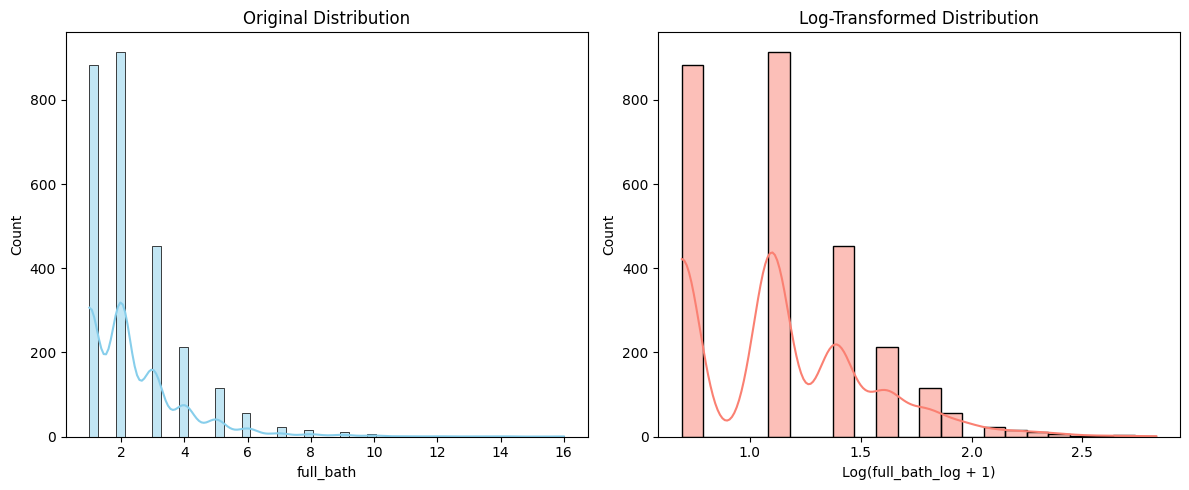

In [27]:
original_skewness = skew(NYC_df['full_baths'])
print("Skewness of original data:", original_skewness)

# Log-transform the 'full_bath' column and create a new column
NYC_df['full_bath_log'] = np.log1p(NYC_df['full_baths'])  # Using np.log1p to avoid issues with zero values

# Measure skewness of the log-transformed 'full_bath' column
log_transformed_skewness = skew(NYC_df['full_bath_log'])
print("Skewness of log-transformed data:", log_transformed_skewness)

# Plot original and log-transformed distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(NYC_df['full_baths'], kde=True, color='skyblue')
plt.title('Original Distribution')
plt.xlabel('full_bath')

plt.subplot(1, 2, 2)
sns.histplot(NYC_df['full_bath_log'], kde=True, color='salmon')
plt.title('Log-Transformed Distribution')
plt.xlabel('Log(full_bath_log + 1)')  # Adding 1 to avoid log of zero

plt.tight_layout()
plt.show()

#### sqft

Skewness of original data: 3.4074845318261837
Skewness of log-transformed data: 0.4110906081274677


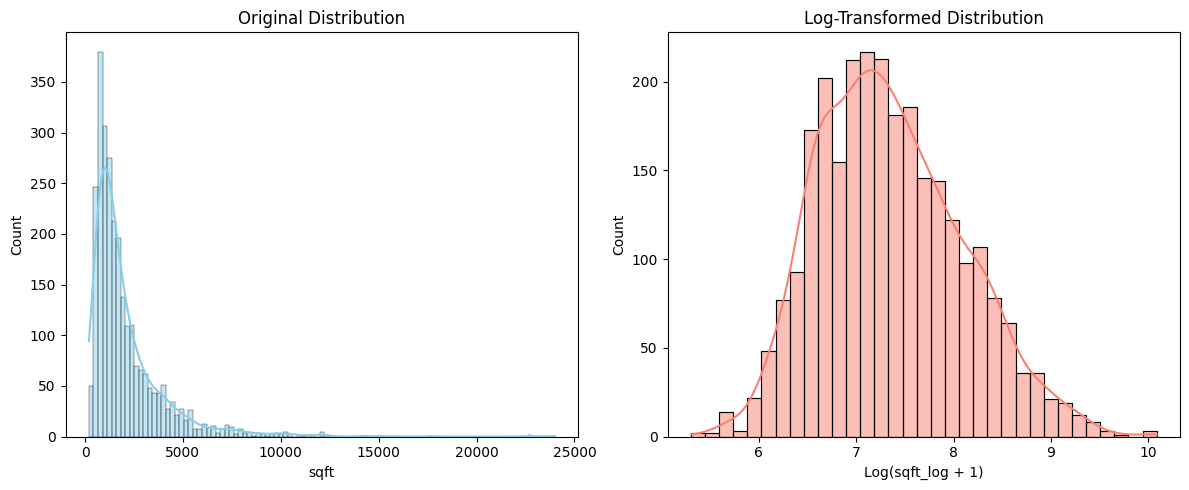

In [28]:
original_skewness = skew(NYC_df['sqft'])
print("Skewness of original data:", original_skewness)

# Log-transform the 'sqft' column and create a new column
NYC_df['sqft_log'] = np.log1p(NYC_df['sqft'])  # Using np.log1p to avoid issues with zero values

# Measure skewness of the log-transformed 'sqft' column
log_transformed_skewness = skew(NYC_df['sqft_log'])
print("Skewness of log-transformed data:", log_transformed_skewness)

# Plot original and log-transformed distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(NYC_df['sqft'], kde=True, color='skyblue')
plt.title('Original Distribution')
plt.xlabel('sqft')

plt.subplot(1, 2, 2)
sns.histplot(NYC_df['sqft_log'], kde=True, color='salmon')
plt.title('Log-Transformed Distribution')
plt.xlabel('Log(sqft_log + 1)')  # Adding 1 to avoid log of zero

plt.tight_layout()
plt.show()

#### list_price

Skewness of original data: 48.88165140749386
Skewness of log-transformed data: 0.35287630404458575


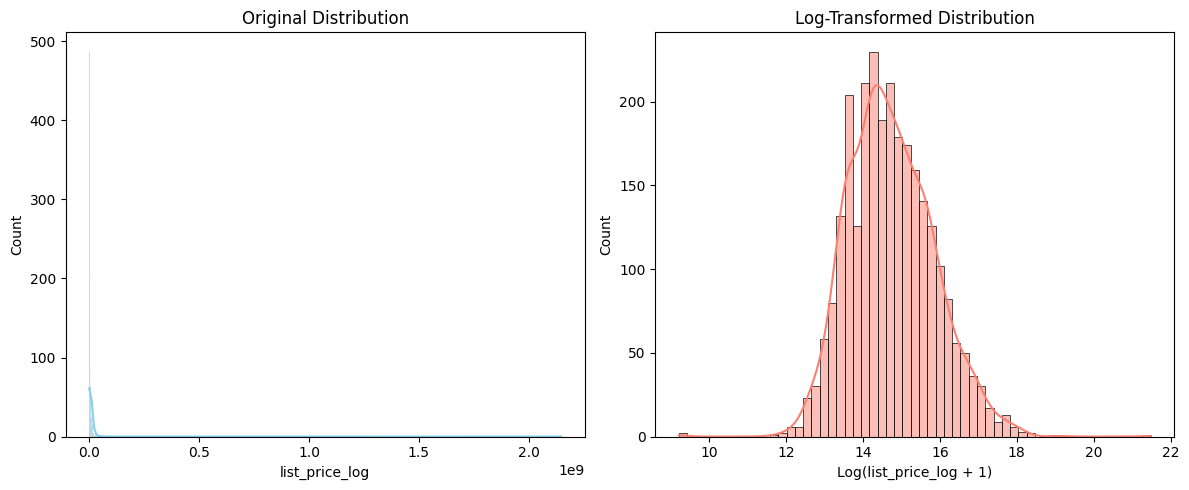

In [29]:
original_skewness = skew(NYC_df['list_price'])
print("Skewness of original data:", original_skewness)

# Log-transform the 'beds' column and create a new column
NYC_df['list_price_log'] = np.log1p(NYC_df['list_price'])  # Using np.log1p to avoid issues with zero values

# Measure skewness of the log-transformed 'beds' column
log_transformed_skewness = skew(NYC_df['list_price_log'])
print("Skewness of log-transformed data:", log_transformed_skewness)

# Plot original and log-transformed distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(NYC_df['list_price'], kde=True, color='skyblue')
plt.title('Original Distribution')
plt.xlabel('list_price_log')

plt.subplot(1, 2, 2)
sns.histplot(NYC_df['list_price_log'], kde=True, color='salmon')
plt.title('Log-Transformed Distribution')
plt.xlabel('Log(list_price_log + 1)')  # Adding 1 to avoid log of zero

plt.tight_layout()
plt.show()

#### price_per_sqft

Skewness of original data: 45.6254629700566
Skewness of log-transformed data: -0.16765832280977658


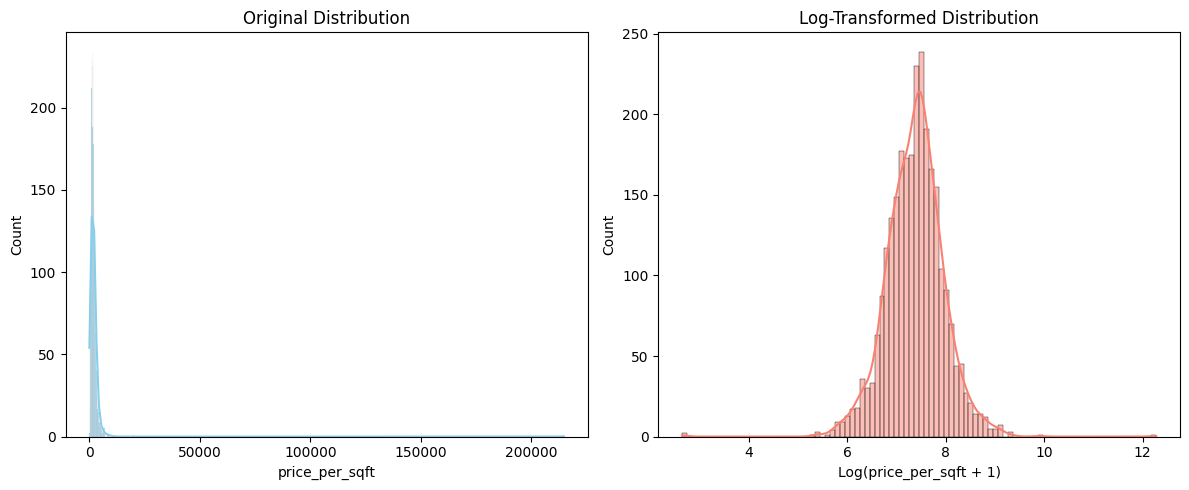

In [30]:
original_skewness = skew(NYC_df['price_per_sqft'])
print("Skewness of original data:", original_skewness)

# Log-transform the 'beds' column and create a new column
NYC_df['price_per_sqft_log'] = np.log1p(NYC_df['price_per_sqft'])  # Using np.log1p to avoid issues with zero values

# Measure skewness of the log-transformed 'beds' column
log_transformed_skewness = skew(NYC_df['price_per_sqft_log'])
print("Skewness of log-transformed data:", log_transformed_skewness)

# Plot original and log-transformed distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(NYC_df['price_per_sqft'], kde=True, color='skyblue')
plt.title('Original Distribution')
plt.xlabel('price_per_sqft')

plt.subplot(1, 2, 2)
sns.histplot(NYC_df['price_per_sqft_log'], kde=True, color='salmon')
plt.title('Log-Transformed Distribution')
plt.xlabel('Log(price_per_sqft + 1)')  # Adding 1 to avoid log of zero

plt.tight_layout()
plt.show()

#### Beds

Skewness of original data: 3.8244200137726074
Skewness of log-transformed data: -0.24644540053030595


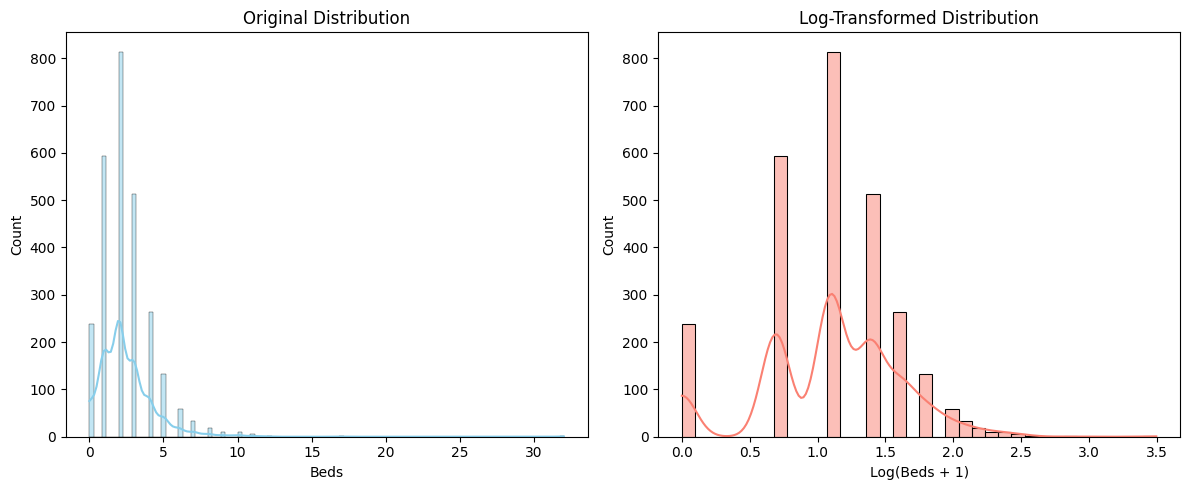

In [31]:
original_skewness = skew(NYC_df['beds'])
print("Skewness of original data:", original_skewness)

# Log-transform the 'beds' column and create a new column
NYC_df['beds_log'] = np.log1p(NYC_df['beds'])  # Using np.log1p to avoid issues with zero values

# Measure skewness of the log-transformed 'beds' column
log_transformed_skewness = skew(NYC_df['beds_log'])
print("Skewness of log-transformed data:", log_transformed_skewness)

# Plot original and log-transformed distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(NYC_df['beds'], kde=True, color='skyblue')
plt.title('Original Distribution')
plt.xlabel('Beds')

plt.subplot(1, 2, 2)
sns.histplot(NYC_df['beds_log'], kde=True, color='salmon')
plt.title('Log-Transformed Distribution')
plt.xlabel('Log(Beds + 1)')  # Adding 1 to avoid log of zero

plt.tight_layout()
plt.show()

In [32]:
NYC_df = NYC_df.drop(columns=['beds', 'full_baths', 'sqft', 'list_price', 'price_per_sqft'])

In [33]:
NYC_df

,city,year_built,full_bath_log,sqft_log,list_price_log,price_per_sqft_log,beds_log
2,New York,2015.0,1.609438,8.295049,16.556351,8.261785,1.386294
6,New York,1988.0,0.693147,6.660575,14.457365,7.798523,0.693147
51,New York,1951.0,1.098612,7.297091,14.897316,7.601402,1.098612
88,New York,1954.0,0.693147,6.447306,13.457407,7.013016,0.693147
89,New York,1954.0,0.693147,6.447306,13.217675,6.773080,0.693147
...,...,...,...,...,...,...,...
16972,New York,1896.0,1.386294,8.039480,15.687313,7.648740,1.386294
16973,New York,2003.0,1.791759,9.177404,17.884537,8.707483,1.791759
16974,New York,2006.0,1.098612,7.380256,14.723770,7.344719,1.098612
16980,New York,1927.0,1.098612,7.319202,15.150512,7.832411,1.098612


In [34]:
NYC_df = NYC_df.rename(columns={'full_bath_log': 'bath', 'sqft_log':'sqft', 'list_price_log':'price', 'price_per_sqft_log':'price_per_sqft', 'beds_log':'bedroom'})

In [35]:
NYC_df

,city,year_built,bath,sqft,price,price_per_sqft,bedroom
2,New York,2015.0,1.609438,8.295049,16.556351,8.261785,1.386294
6,New York,1988.0,0.693147,6.660575,14.457365,7.798523,0.693147
51,New York,1951.0,1.098612,7.297091,14.897316,7.601402,1.098612
88,New York,1954.0,0.693147,6.447306,13.457407,7.013016,0.693147
89,New York,1954.0,0.693147,6.447306,13.217675,6.773080,0.693147
...,...,...,...,...,...,...,...
16972,New York,1896.0,1.386294,8.039480,15.687313,7.648740,1.386294
16973,New York,2003.0,1.791759,9.177404,17.884537,8.707483,1.791759
16974,New York,2006.0,1.098612,7.380256,14.723770,7.344719,1.098612
16980,New York,1927.0,1.098612,7.319202,15.150512,7.832411,1.098612


#### Rescale Data

In [36]:
# Min-Max scaling
min_year_built = NYC_df['year_built'].min()
max_year_built = NYC_df['year_built'].max()

NYC_df['year_built_scaled'] = (NYC_df['year_built'] - min_year_built) / (max_year_built - min_year_built)

# Print the scaled 'year_built' column
print(NYC_df['year_built_scaled'])

2        0.954082
6        0.816327
51       0.627551
88       0.642857
89       0.642857
           ...   
16972    0.346939
16973    0.892857
16974    0.908163
16980    0.505102
16983    0.622449
Name: year_built_scaled, Length: 2698, dtype: float64


In [37]:
NYC_df = NYC_df.drop(columns='year_built')

In [38]:
NYC_df = NYC_df.rename(columns={'year_built_scaled':'year'})
NYC_df

,city,bath,sqft,price,price_per_sqft,bedroom,year
2,New York,1.609438,8.295049,16.556351,8.261785,1.386294,0.954082
6,New York,0.693147,6.660575,14.457365,7.798523,0.693147,0.816327
51,New York,1.098612,7.297091,14.897316,7.601402,1.098612,0.627551
88,New York,0.693147,6.447306,13.457407,7.013016,0.693147,0.642857
89,New York,0.693147,6.447306,13.217675,6.773080,0.693147,0.642857
...,...,...,...,...,...,...,...
16972,New York,1.386294,8.039480,15.687313,7.648740,1.386294,0.346939
16973,New York,1.791759,9.177404,17.884537,8.707483,1.791759,0.892857
16974,New York,1.098612,7.380256,14.723770,7.344719,1.098612,0.908163
16980,New York,1.098612,7.319202,15.150512,7.832411,1.098612,0.505102


In [39]:
NYC_df.to_csv('Data/Preprocessed/NYC_clean.csv')